In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('opiate_deaths.csv')

In [3]:
df

,STATEID,FIRSTNAME,MIDDLENAME,LASTNAME,MAIDENNAME,SUFFIX,BIRTHDATE,DEATHDATE,GENDER,RACE,...,DEATHCITY,DEATHCOUNTY,MANNERDEATH,INJURY_DATE,INJURYPLACE,INJURYSTATE,INJURYCOUNTY,INJURYDESC,CAUSEA,CAUSEB
0,2005-MN-000344,RONNIE,GERALD,BLANKS,NaN,NaN,10/17/1955,1/1/2005,M,African American,...,MINNEAPOLIS,HENNEPIN,ACCIDENT,NaN,UNKNOWN,UNKNOWN,UNKNOWN,DECEASED DIED AFTER SELF-ADMINISTRATION OF ABO...,MIXED DRUG OVERDOSE (MORPHINE AND ALCOHOL),NaN
1,2005-MN-001316,MICHAEL,JOSEPH CLEMENS,JOHNSON,NaN,NaN,1/14/1964,1/9/2005,M,White,...,BLOOMINGTON,HENNEPIN,COULD NOT BE DETERMINED,NaN,UNKNOWN,UNKNOWN,UNKNOWN,DECEASED DIED AFTER SELF-ADMINISTRATION OF OP...,OPIATE OVERDOSE,NaN
2,2005-MN-001973,DONNIE,RAY,COOPER,NaN,NaN,11/10/1962,1/15/2005,M,White,...,SAINT PAUL,RAMSEY,ACCIDENT,1/15/2005,HOME,MINNESOTA,RAMSEY,INGESTED METHADONE,METHADONE TOXICITY,NaN
3,2005-MN-001377,RANDY,J.,SCHLAGEL,NaN,NaN,7/23/1957,1/18/2005,M,White,...,ROCKFORD TOWNSHIP,WRIGHT,ACCIDENT,NaN,HOME,MINNESOTA,WRIGHT,DEC INGESTED AN UNKNOWN AMOUNT OF METHADONE,METHADONE TOXICITY,NaN
4,2005-MN-007563,TERRY,JOHN,LUND,NaN,NaN,8/21/1951,1/20/2005,M,White,...,MINNEAPOLIS,HENNEPIN,ACCIDENT,1/20/2005,UNSPECIFIED PLACE,UNKNOWN,UNKNOWN,DECEASED DIED AFTER INGESTING AN OVERDOSAGE OF...,MORPHINE OVERDOSE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,2017-MN-044471,AMBER,LOVETTE,MOTL,NaN,NaN,2/14/1981,12/29/2017,F,White,...,LINO LAKES,ANOKA,ACCIDENT,NaN,UNKNOWN,UNKNOWN,UNKNOWN,INJECTED ILLICIT DRUGS.,TOXIC EFFECTS OF MULTIPLE DRUGS (ACRYL FENTANY...,NaN
3803,2017-MN-044432,SAMUEL,DAVID,TREADAWAY,NaN,NaN,9/11/1987,12/29/2017,M,White,...,SAINT CLOUD,STEARNS,ACCIDENT,12/29/2017,RESIDENCE,MINNESOTA,STEARNS,UTILIZED CARFENTANIL,CARFENTANIL TOXICITY,NaN
3804,2017-MN-044459,TERRY,THOMAS,RIVARD,RIVARD,NaN,2/7/1953,12/30/2017,M,White,...,SAINT PAUL,RAMSEY,ACCIDENT,12/30/2017,RESIDENCE,MINNESOTA,RAMSEY,INGESTED OXYCODONE/OXYCOTNTIN AND DIAZEPAM,PROBABLE MIXED DRUG OVERDOSE,NaN
3805,2017-MN-044501,ADALBERTO,NaN,POLANCO MORILLO,NaN,NaN,7/27/1971,12/30/2017,M,White,...,MINNEAPOLIS,HENNEPIN,NATURAL,NaN,NaN,NaN,NaN,NaN,HEPATIC FAILURE,CIRRHOSIS


In [4]:
df.columns

Index(['STATEID', 'FIRSTNAME', 'MIDDLENAME', 'LASTNAME', 'MAIDENNAME',
       'SUFFIX', 'BIRTHDATE', 'DEATHDATE', 'GENDER', 'RACE',
       'HISPANICETHNICITY', 'AGEYEARS', 'RESADDRESS', 'RESSTATE', 'RESCITY',
       'RESCOUNTY', 'ZIP', 'ARMEDFORCES', 'YEARSEDUCATION', 'OCCUPATION',
       'INDUSTRY', 'MARITALSTATUS', 'PLACETYPE', 'DEATHCITY', 'DEATHCOUNTY',
       'MANNERDEATH', 'INJURY_DATE', 'INJURYPLACE', 'INJURYSTATE',
       'INJURYCOUNTY', 'INJURYDESC', 'CAUSEA', 'CAUSEB'],
      dtype='object')

In [5]:
df.shape

(3807, 33)

In [6]:
# Check for duplicate records
df[['STATEID', 'DEATHCITY']].groupby('STATEID').count().reset_index().sort_values('STATEID', ascending=False)

,STATEID,DEATHCITY
3806,2017-MN-044531,1
3805,2017-MN-044530,1
3804,2017-MN-044515,1
3803,2017-MN-044501,1
3802,2017-MN-044495,1
...,...,...
4,2005-MN-002179,1
3,2005-MN-001973,1
2,2005-MN-001377,1
1,2005-MN-001316,1


In [7]:
# Group by death city
deaths_by_city = df[['STATEID', 'DEATHCITY']].groupby('DEATHCITY').count().reset_index().sort_values('STATEID', ascending=False)
deaths_by_city

,DEATHCITY,STATEID
241,MINNEAPOLIS,829
341,SAINT PAUL,285
98,DULUTH,138
337,SAINT CLOUD,93
325,ROCHESTER,89
...,...,...
249,MOOSE LAKE,1
251,MORRILL TOWNSHIP,1
253,MORRISTOWN,1
254,MORTON,1


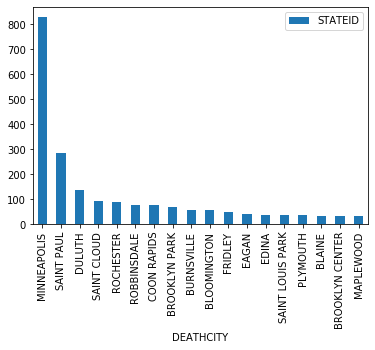

In [19]:
deaths_by_city[deaths_by_city['STATEID'] > 30].plot.bar(x='DEATHCITY', y='STATEID')

In [9]:
# Join with city population to calculate per capita

In [ ]:
# TODO:
# Strip leading/trailing whitespace
# Recode M, F to Male, Female

In [ ]:
# Dealing with "dirty" data<br>
# Let's look at the hispanicethnicity column

# ```{r}
# #Notice the wide variety of results?
# deaths %>% group_by(hispanicethnicity) %>% summarise(count=n())
# ```

# Uppercase all values
# ```{r}

# #Let's start by converting all the values to uppercase to make it simpler
# #Like many things in R, there's more than one way to do this

# # the base R function called "toupper()" converts values to uppercase
# #deaths <-  deaths %>% mutate(hispanicethnicity= toupper(hispanicethnicity))

# #alternatively, you can use stringr function str_to_upper
# deaths <-  deaths %>% mutate(hispanicethnicity= str_to_upper(hispanicethnicity))

# #now let's see what we're dealing with
# deaths %>% count(hispanicethnicity)


# ```

# #Populate a new column
# ```{r}
# #We'll use grepl() to find any records that start with "NOT" or start with "NON"
# # for all others, we'll transfer what is already in hispanicethnicity column
# #grepl comes from Base R

# deaths <-  deaths %>% 
#   mutate(hispanic_new = 
#            case_when(grepl("NOT", hispanicethnicity) ~ 'NOT HISPANIC', grepl("NON", hispanicethnicity) ~ 'NOT HISPANIC', TRUE ~ hispanicethnicity))


# #let's see our new column

# deaths %>% 
#   group_by(hispanic_new) %>% 
#   summarise(numdeaths = n())

# ```


# #How many people died by age group?
# Currently our data shows just the person's age (ageyears). To answer this question, we need to create a new column assigning each person to an age group. How you set your group depends on a variety of factors. 
# ```{r}
# #First let's look at the distribution of the ages by plotting a basic histogram

# ggplot(deaths, aes(x=ageyears)) + geom_histogram()




# ```

# ```{r}
# # Change the width of bins (5 years in each bin) and add colors
# ggplot(deaths, aes(x=ageyears)) + 
#   geom_histogram(binwidth=5, color="white", fill="light blue")

# ```




# Create an agegroup column
# ```{r}

# deaths <-  deaths %>% 
#   mutate(agegroup = case_when(ageyears < 20 ~ '0-19',
#                               ageyears >=20 & ageyears < 35 ~ '20-34',
#                               ageyears >=35 & ageyears < 50 ~ '35-49',
#                               ageyears >=50 & ageyears <70 ~ '50-69',
#                               ageyears >=70 ~'70 and over',
#                               TRUE ~'unknown'))

# #Let's see what this new column looks like
# deaths %>% 
#   group_by(agegroup) %>% 
#   summarise( count = n() )
# ```

# #Bar chart showing results
# ```{r}
# #create a new dataframe, grouping our values by age group
# deaths_by_age <-  deaths %>% group_by(agegroup) %>% summarise(numdeaths = n())

# #plot this new data frame

# ggplot(deaths_by_age, aes(x=agegroup, y=numdeaths))+
#   geom_bar(stat="identity")
# ```


# #YOUR TURN
# Insert a code chunk and write your own quer that creates a column that has 3 groups: Under 18; 65 and over; Everybody else



# #YOUR TURN
# Show how many deaths there were in each group?






# #Pivoting data
# ```{r}

# #Try running this query. Wouldn't it be nice to have the years as columns?
# agegroup_by_year <-  deaths %>%
#   group_by(deathyr, agegroup) %>%
#   summarise(count=n())
# ```

# #Years as the columns

# ```{r}
# #pivot_wider is from Tidyverse
# #it converts long data to wide data
# #three arguments -- name of dataframe, names_from (which column has the labels for your new columns),
# #and values_from (which column has the values to go in your new columns)

# agegroup_wide <-  pivot_wider(agegroup_by_year, names_from=deathyr, values_from = count)


# ```

# #Age groups as columns
# ```{r}
# pivot_wider(agegroup_by_year, names_from=agegroup, values_from = count)
# ```

# #Make that into a new dataframe
# And add clean_names()
# ```{r}
# age_by_yr <-  pivot_wider(agegroup_by_year, names_from=agegroup, values_from = count) %>% clean_names()
# ```

# #Add total and pct columns
# ```{r}
# #Notice that you can use mutate to create more than one new column at the same time
# #and even use the first new column in your calculation for the second one!

# age_by_yr <-  age_by_yr %>%
#   mutate(total = x0_19 + x20_34 + x35_49 + x50_69 + x70_and_over,
#          pctUnder20 = (x0_19 / total)*100)



# ```

# #YOUR TURN
# Display the year and pctUnder20; arrange by year
# ```{r}
# #Notice that in the query above when I created the pctUnder20 variable, I made the U uppercase. 
# #So now I need to refer to it exactly that way when using it in subsequent queries


# ```


# #Pivot Longer
# ```{r}
# #we'll flip the agegroup2 data frame back to what it originally looked like
# #first argument is the column you want to retain on the far left
# #then you give it names for the new columns
# age_by_yr %>%  pivot_longer(-deathyr,  names_to = "myvariables", values_to = "myvalues" )
# ```

# #Tell it to leave out a column (or more)
# ```{r}

# #In the select portion, putting a minus sign in front of a column name will exclude it from the results
# #but it will keep any variables that you don't mention

# age_by_yr  %>% 
#   select(-pctUnder20, -total)%>%
#   pivot_longer(-deathyr,  names_to = "myvariables", values_to = "myvalues" )
# ```


# #Regular expressions

# Find all the deaths involving Methadone
# ```{r}
# #grepl looks for the value anywhere in the column you specify
# #https://www.rdocumentation.org/packages/base/versions/3.6.1/topics/grep

# #Notice that I've put METHADONE in all capital letters because that is how it is stored in the data

# deaths %>%
#   filter(grepl("METHADONE", causea)) %>%
#   group_by(causea) %>%
#   summarise(count=n()) %>% 
#   arrange(desc(count))
# ```

# #Make a new column

# ```{r}
# #Now that we've found all those deaths involving methadone, let's make a new field
# #that says "yes" for those that have the word methadone in the causea columns
# #and put in "no" for all other records

# deaths <-  deaths %>%
#   mutate(methadone = case_when(grepl("METHADONE", causea)~'yes',
#                                                    TRUE~'no'))
# ```